In [1]:
import numpy as np
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

#parameters
VAL_RATIO=0.05
BATCH_SIZE=128


train=np.load("train_11.npy")
label=np.load("train_label_11.npy").astype(int)

l=int(train.shape[0]*(1-VAL_RATIO))
train_data=train[:l]
train_label=label[:l]
val_data=train[l:]
val_label=label[l:]

class data(Dataset):
    def __init__(self,x,y):
        self.data=torch.tensor(x,dtype=torch.float32)
        self.label=torch.tensor(y,dtype=torch.long)
    
    def __getitem__(self,idx):
        return self.data[idx],self.label[idx]
    
    def __len__(self):
        return len(self.data)

train_set=data(train_data,train_label)
val_set=data(val_data,val_label)

train_loader = DataLoader(train_set, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_set, batch_size=BATCH_SIZE, shuffle=False)

print(train_data.shape)

(1168435, 429)


第 1 轮 : train_loss=2.9564,train_acc=0.4683,val_loss=2.9145,val_acc=0.5229
第 2 轮 : train_loss=2.9012,train_acc=0.5668,val_loss=2.8977,val_acc=0.5958
第 3 轮 : train_loss=2.8840,train_acc=0.6030,val_loss=2.8891,val_acc=0.6203
第 4 轮 : train_loss=2.8733,train_acc=0.6231,val_loss=2.8845,val_acc=0.6297
第 5 轮 : train_loss=2.8654,train_acc=0.6350,val_loss=2.8804,val_acc=0.6376
第 6 轮 : train_loss=2.8591,train_acc=0.6437,val_loss=2.8772,val_acc=0.6428
第 7 轮 : train_loss=2.8536,train_acc=0.6488,val_loss=2.8753,val_acc=0.6435
第 8 轮 : train_loss=2.8492,train_acc=0.6538,val_loss=2.8730,val_acc=0.6423
第 9 轮 : train_loss=2.8454,train_acc=0.6578,val_loss=2.8731,val_acc=0.6538
第 10 轮 : train_loss=2.8418,train_acc=0.6611,val_loss=2.8722,val_acc=0.6576
第 11 轮 : train_loss=2.8387,train_acc=0.6642,val_loss=2.8714,val_acc=0.6587
第 12 轮 : train_loss=2.8360,train_acc=0.6666,val_loss=2.8704,val_acc=0.6450
第 13 轮 : train_loss=2.8335,train_acc=0.6679,val_loss=2.8707,val_acc=0.6541
第 14 轮 : train_loss=2.8311,train_a

C:\Users\dell\AppData\Local\Temp\ipykernel_3336\873709347.py:83: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x,val_acc_list,'r-',color='red')


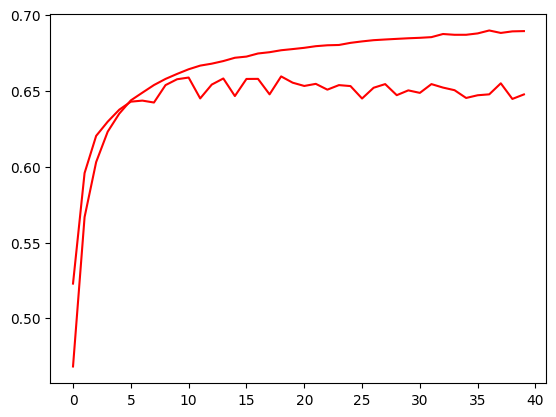

In [2]:
import matplotlib.pyplot as plt
import torch.nn as nn

#net
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.net=nn.Sequential(
            nn.Linear(429,1024),
            nn.ReLU(),
            nn.Linear(1024,512),
            nn.ReLU(),
            nn.Linear(512,128),
            nn.ReLU(),
            nn.Linear(128,39),
            nn.Sigmoid()
        )
    
    def forward(self,x):
        x=self.net(x)
        return x
    
device='cuda'

#parameters
LEARNING_RATE=0.0001
EPOCH=40

model=Net().to(device)
criterion=nn.CrossEntropyLoss() 
optimizer=torch.optim.Adam(model.parameters(), lr=LEARNING_RATE) 


train_acc_list=[]
val_acc_list=[]

#training
for i in range(EPOCH):
    train_acc=0.0
    train_loss=0.0
    val_acc=0.0
    val_loss=0.0
    
    #train_set
    model.train()
    for j,data in enumerate(train_loader):
        optimizer.zero_grad()
        inputs,labels=data
        inputs=inputs.to(device)
        labels=labels.to(device)
        outputs=model(inputs)
        loss=criterion(outputs,labels)
        loss.backward()
        optimizer.step()
        
        train_loss+=loss.item()
        _,pred=torch.max(outputs,dim=1)
        train_acc+=(pred.cpu()==labels.cpu()).sum().item()
    
    #validation_set
    model.eval()
    with torch.no_grad():
        for j,data in enumerate(val_loader):
            inputs,labels=data
            inputs=inputs.to(device)
            labels=labels.to(device)
            outputs=model(inputs)
            loss=criterion(outputs,labels)
            
            val_loss+=loss.item()
            _,pred=torch.max(outputs,dim=1)
            val_acc+=(pred.cpu()==labels.cpu()).sum().item()
        
    
    
    train_loss=train_loss/len(train_loader)
    train_acc=train_acc/len(train_set)
    val_loss=val_loss/len(val_loader)
    val_acc=val_acc/len(val_set)
    train_acc_list.append(train_acc)
    val_acc_list.append(val_acc)
    print("第",i+1,'轮 : train_loss={:.4f},train_acc={:.4f},val_loss={:.4f},val_acc={:.4f}'.format(train_loss,train_acc,val_loss,val_acc))

plt.figure()
x=range(0,40)
plt.plot(x,train_acc_list, 'r-')
plt.plot(x,val_acc_list,'r-',color='red')
plt.show()



